Hypothesis
- Traffic will increase as the yars pass by
- Traffic will be high from May to Oct
- Traffic on weekdays will be more
- Traffic during the peak hours will be high

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

ID: uniques number given to each obs point

Datetime: time of each ob

Count: passenger count corresponding to each Datetime

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
# for extract the time and date from Datetime
train.Datetime=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test.Datetime=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_original.Datetime=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original.Datetime=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
train.head() # Datetime type: object -> datetime formet

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [10]:
# hypothesis for the effect of hour, day, month on the passenger count
# extract the year, month, day and hour from the Datetime

for i in (train, test, train_original, test_original):
    i["year"]=i.Datetime.dt.year
    i["month"]=i.Datetime.dt.month
    i["day"]=i.Datetime.dt.day
    i["Hour"]=i.Datetime.dt.hour

In [11]:
train["dayofweek"] = train.Datetime.dt.dayofweek
temp = train.Datetime

In [12]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6: # weekend
        return 1
    else: # not weekend
        return 0

In [13]:
train["weekend"] = train.Datetime.apply(applyer)

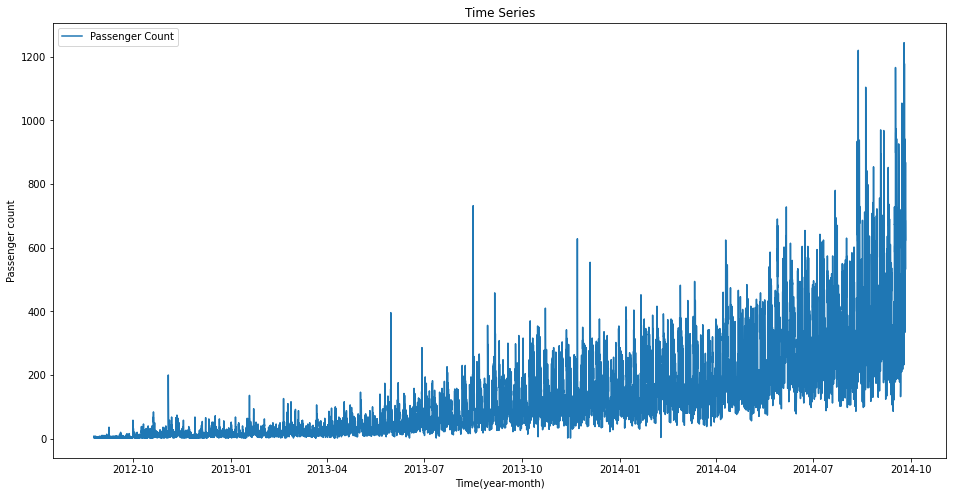

In [14]:
train.index = train.Datetime # to get the time period on the x-axis
df = train.drop('ID',1)
ts = df.Count
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')


increasing trend in the series, i.e., the number of count is increasing with respect to time

at certain points there is a sudden increase in the number of counts, possible reason of high traffic: on particular day, due to some event 

<AxesSubplot:xlabel='year'>

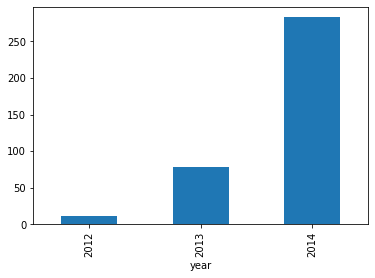

In [15]:
# verify 1st hypothesis: traffic will increase as years pass by
train.groupby('year')['Count'].mean().plot.bar()

exponential growth in the traffic with respect to year which validates 1st hypothesis

<AxesSubplot:xlabel='month'>

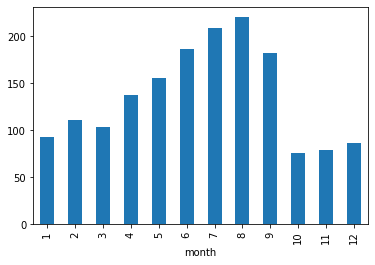

In [16]:
# verify 2nd hypothesis: traffic will be high from May to Oct
train.groupby('month')['Count'].mean().plot.bar()

decrease in the mean of passenger count in last three months, doesn't look right

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

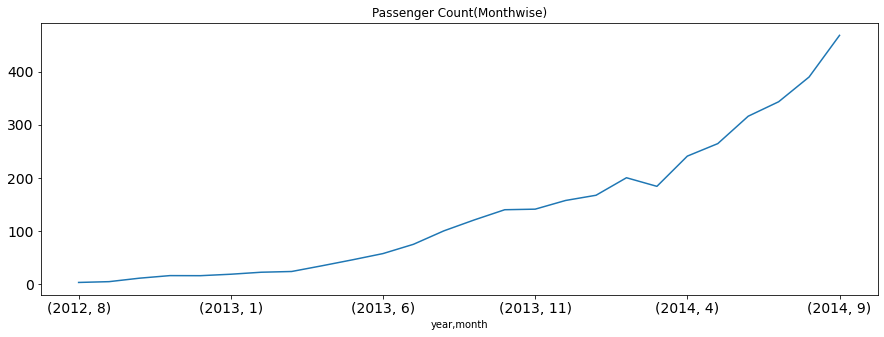

In [17]:
# let's look at the monthly mean of each year separately
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5), title = 'Passenger Count(Monthwise)', fontsize=14)

month 10, 11 and 12 are not present for the year 2014, and the mean value for theses month in year 2012 is very less.

we can see an increasing trend in monthly passenger count and the growth is approximately exponential


<AxesSubplot:xlabel='day'>

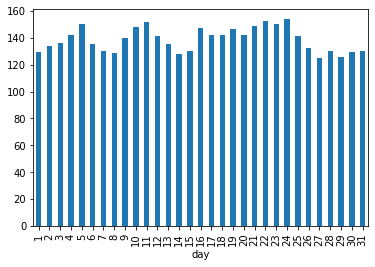

In [18]:
# look at the daily mean of passenger count
train.groupby('day')['Count'].mean().plot.bar()

not getting much insights from day wise count of the passengers

<AxesSubplot:xlabel='weekend'>

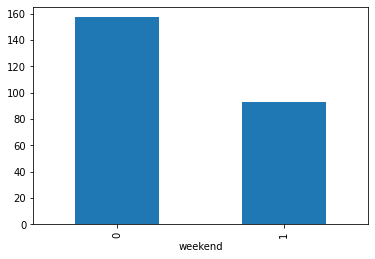

In [19]:
# 3rd hypothesis: traffic will be more on weekdays
train.groupby('weekend')['Count'].mean().plot.bar()

more on weekdays as compared to weekends which validates 3rd hypothesis

<AxesSubplot:xlabel='dayofweek'>

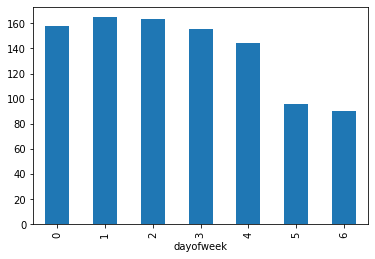

In [20]:
# look at the day wise passenger count
train.groupby('dayofweek')['Count'].mean().plot.bar()

the passenger count is less for saturday and sunday as compared to the other days of the week

<AxesSubplot:xlabel='Hour'>

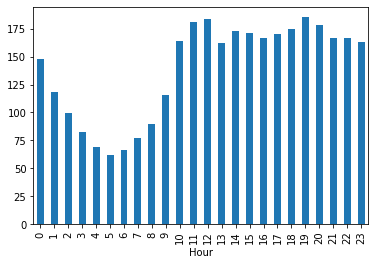

In [21]:
# 4th hyposthesis: traffic during the peak hours will be high
train.groupby('Hour')['Count'].mean().plot.bar()

it can be inferred:

- the peak traffic is 7 p.m. and then decreasing trend till 5 a.m.
- after that passenger count increases again and peak again b/w 11 a.m. and 12 noon


In [22]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

hourly = train.resample('H').mean() # hourly time series
daily = train.resample('D').mean() # daily time series
weekly = train.resample('W').mean() # weekly time series
monthly = train.resample('M').mean() # monthly time series

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

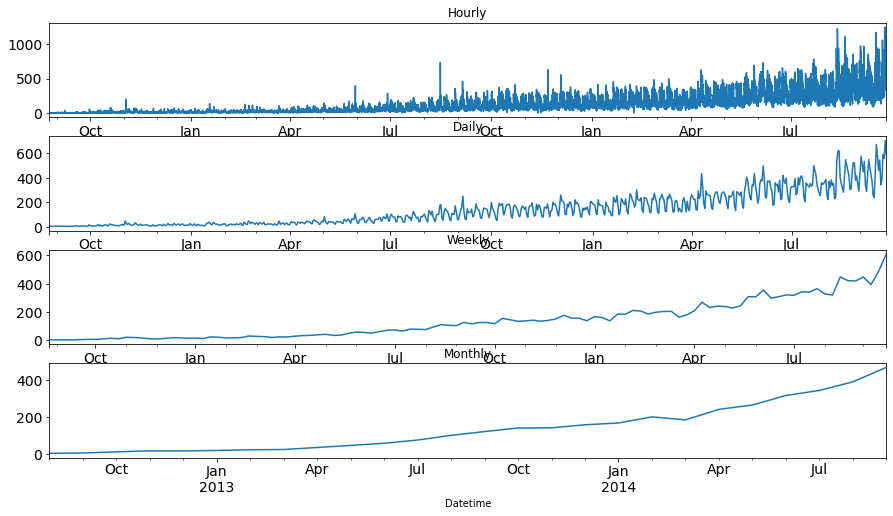

In [23]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8),title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly', fontsize=14, ax=axs[3])

the time series is becoming more and more stable when it is aggregated on daily, weekly, and monthly basis

more stable, easier for a model to learn
- but, it would be difficult to convert the monthly / weekly predictions to hourly predictions, convert process: monthly to weekly, weekly to daily, daily to hourly
- so, working on the daily time series

In [24]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

In [25]:
# divide the data into training and validation set, take last 3 months as the validation data and rest for training data
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

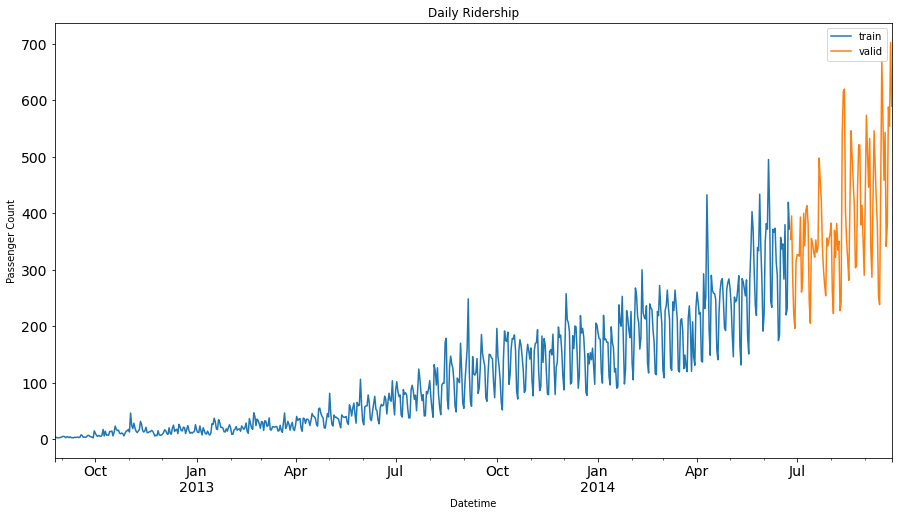

In [26]:
Train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()

### Modeling Techniques for forecasting the time series

- Holt's Linear Trend Model

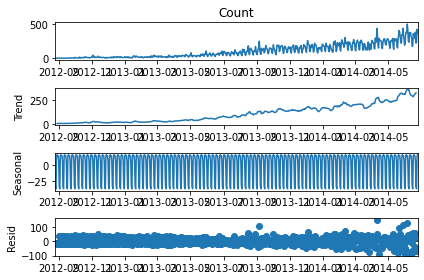

In [27]:
# decompose the time series in four parts
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
sm.tsa.seasonal_decompose(Train.Count).plot()
plt.show()

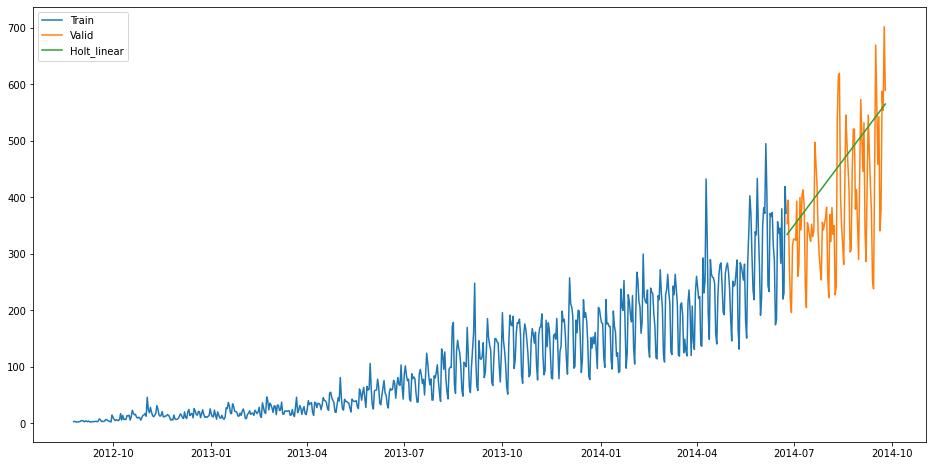

In [28]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train.Count, label='Train')
plt.plot(valid.Count, label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [29]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    '''
    calculate the Dickey-Fuller test
    '''
    # determining rolling statistics
    rolmean = timeseries.rolling(24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(24).std()
    # plot rolling statistics
    origin = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # perform Dickey-Fuller test
    print('Results of Dicky-Fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

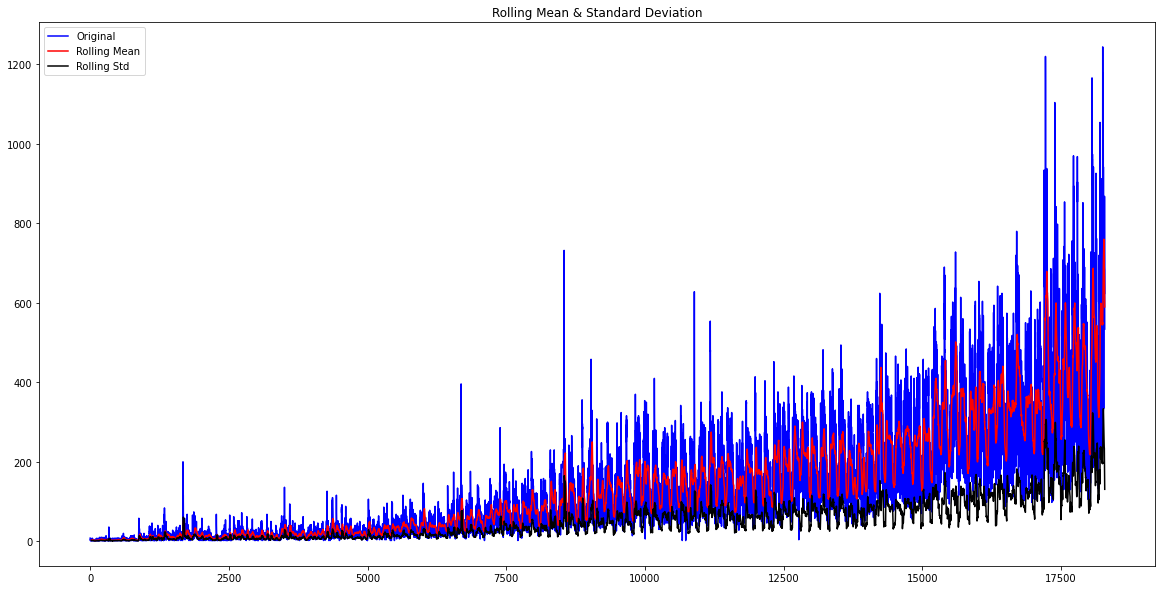

Results of Dicky-Fuller test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [40]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

The statistics show that the time series is stationary as t* < critical value (1, 5, 10%), but we can see an increasing trend in the data.
-> remove the trend and seasonality from the data to make the data more stationary

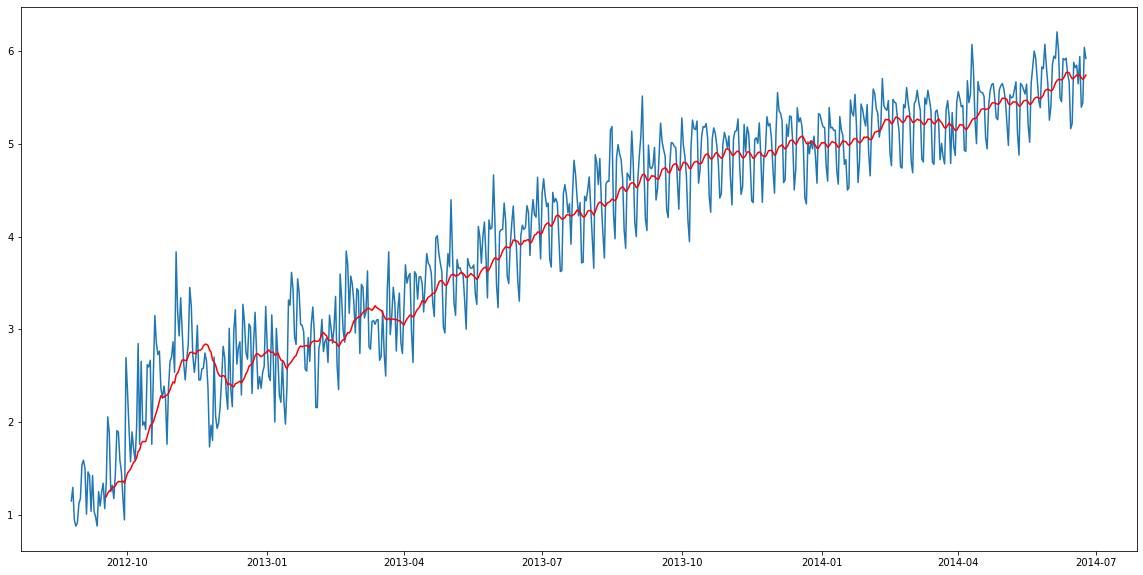

In [42]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color='red')
plt.show()

### Remove Trend

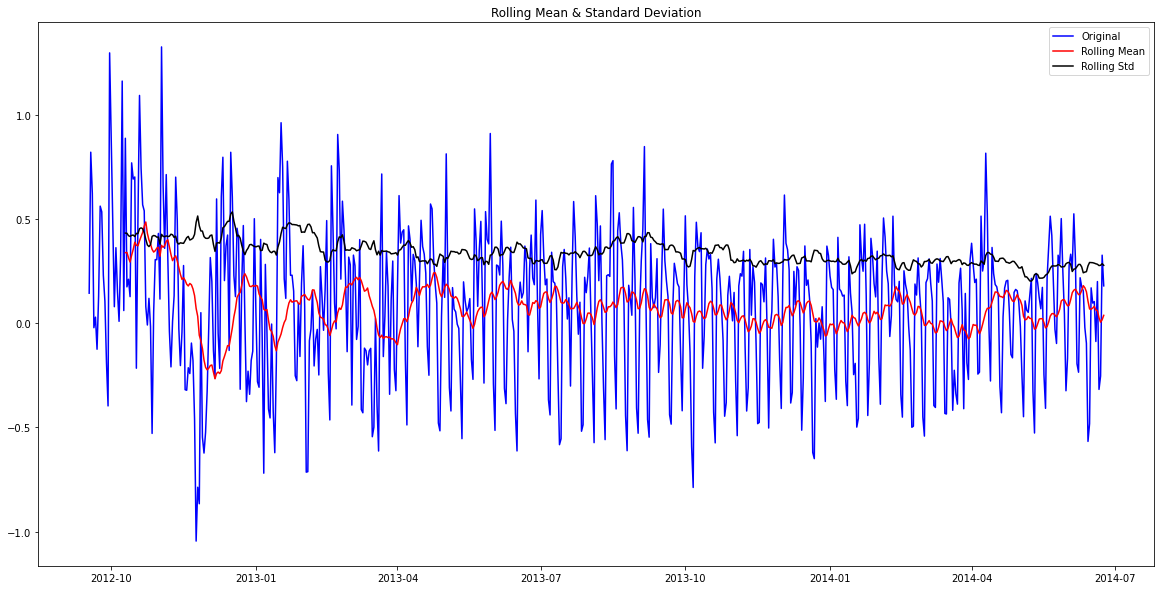

Results of Dicky-Fuller test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [43]:
# remove trend
train_log_moving_avg_diff = Train_log - moving_avg
# rolling mean of the window size w/ 24 -> first 23 values are na
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

t* << critical valueL trend is almost removed

stabilize the mean of the time series, also requirement for a stationary time series
- differencing can help to make the series stable and eliminate the trend

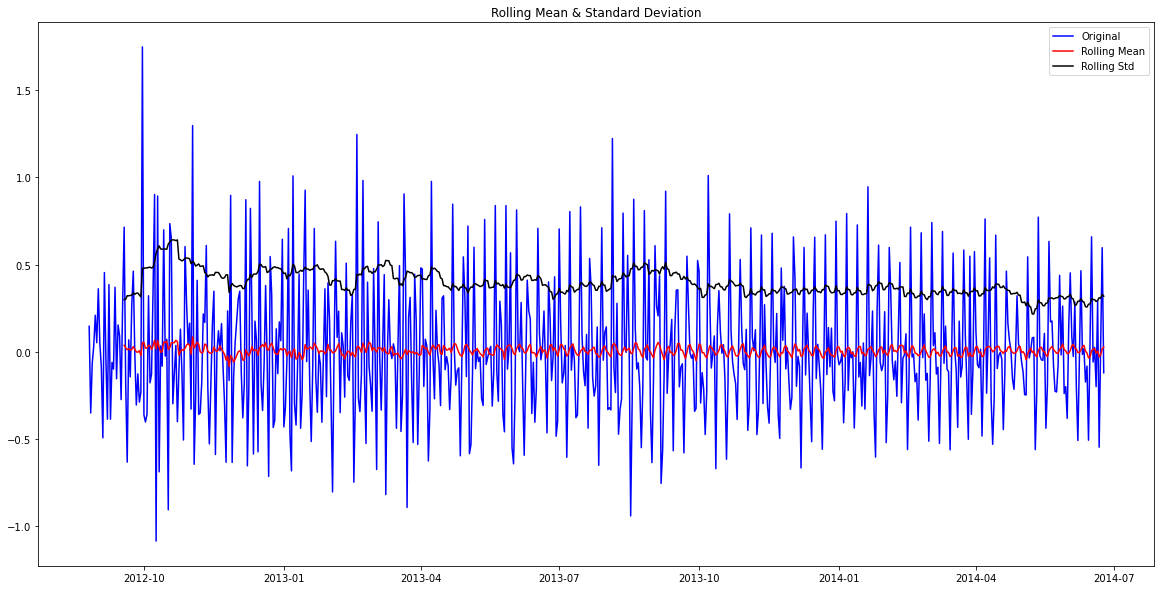

Results of Dicky-Fuller test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [44]:
# differencing shifted train data
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

decompose the time series into trend and seasonality and will get the residual (random variation in the series)

### Remove Seaonality
- mean periodic fluctuations, a seasonal pattern exists when a series is influenced by seasonal factors(e.g., the quarter of the year, the month, or day of the week)
- seasonality is always of a fixed and known period
- seasonal decompose: to decompose the time series into trend, seasonality, and residuals

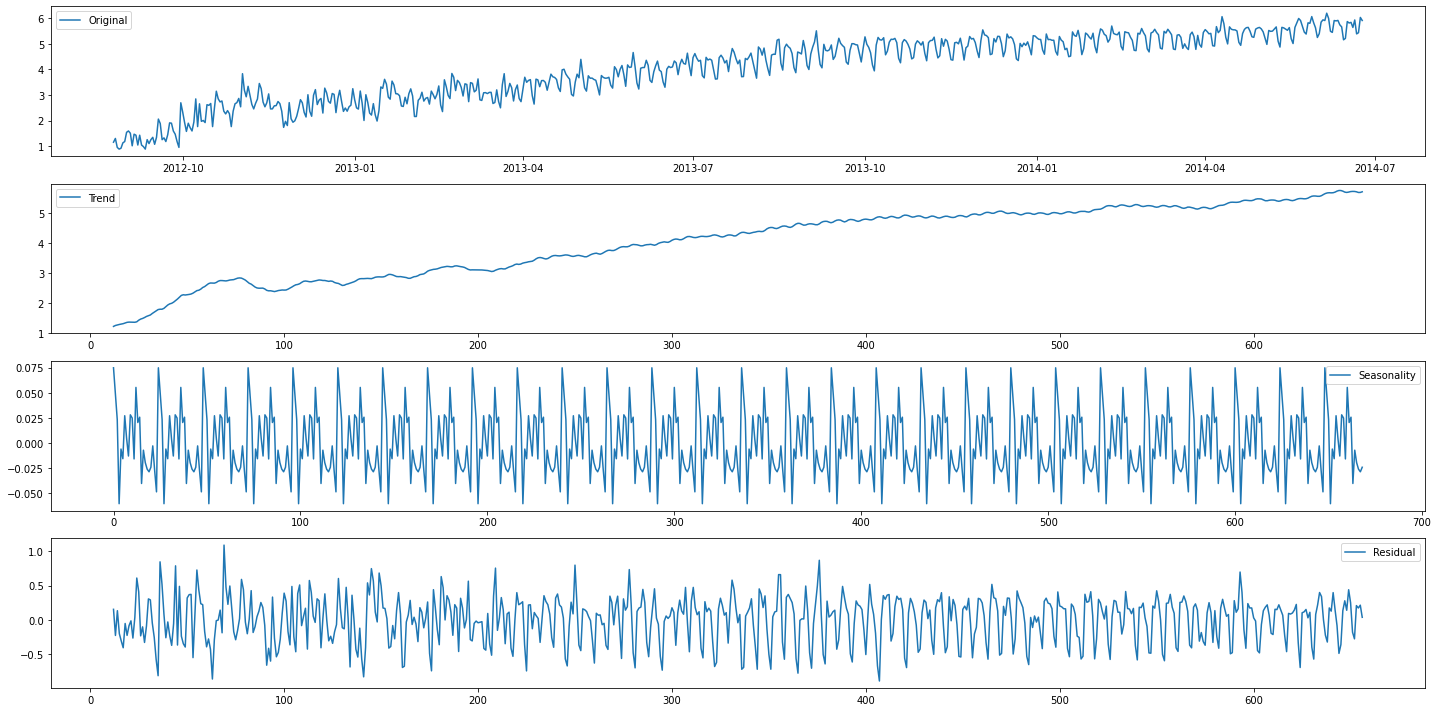

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


there are the trend, residuals and the seasonality. Seasonality shows a constant trend in counter

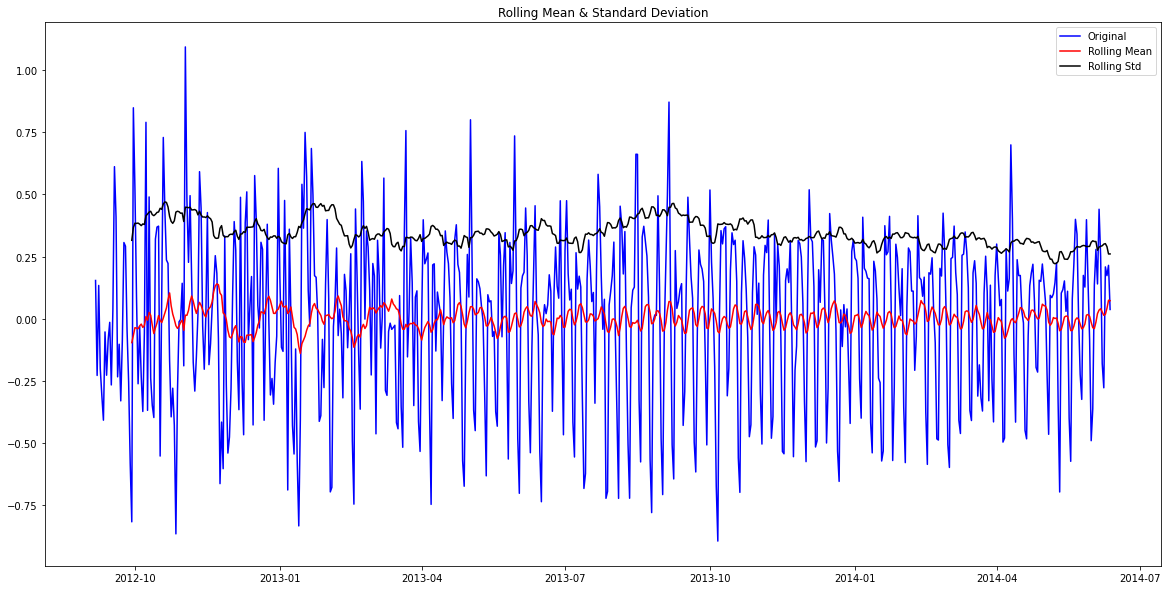

Results of Dicky-Fuller test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [47]:
# check stationarity of residuals
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

The residuals are stationary. Now, forecast the time series using different models.

### Forecasting the time series using ARIMA

- fit the ARIMA model on our time series, find the optimized values for the p, d, q parameters
- use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph to find the optimized values of the paramters
- ACF: a measure of the correlation b/w the TimeSeries with a lagged version of itself
- PACF: a measure of the correlation b/w the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons

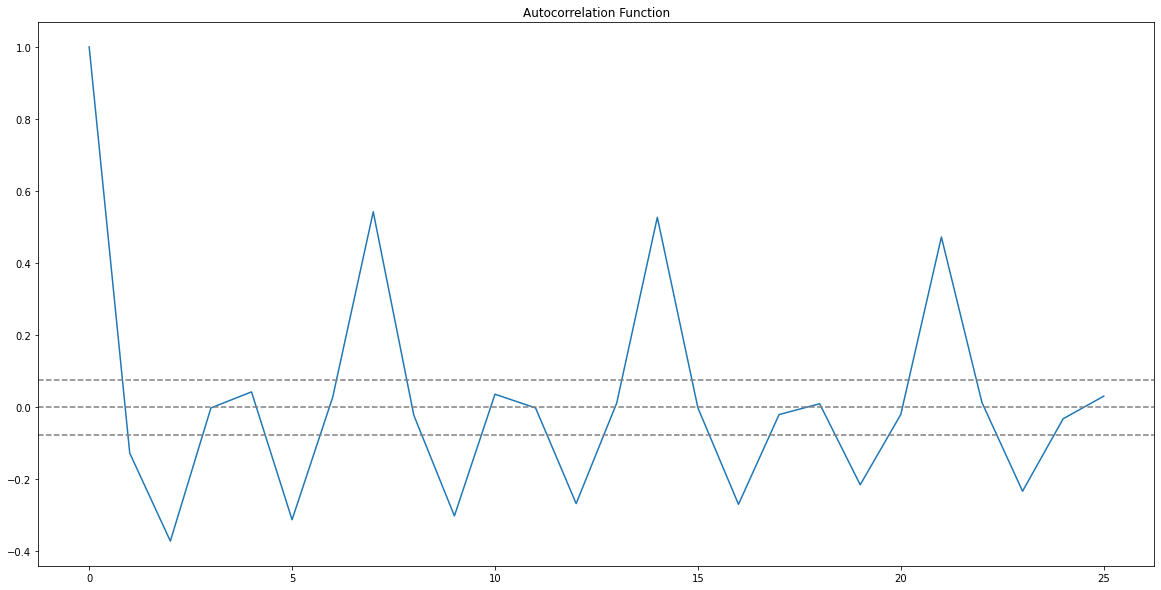

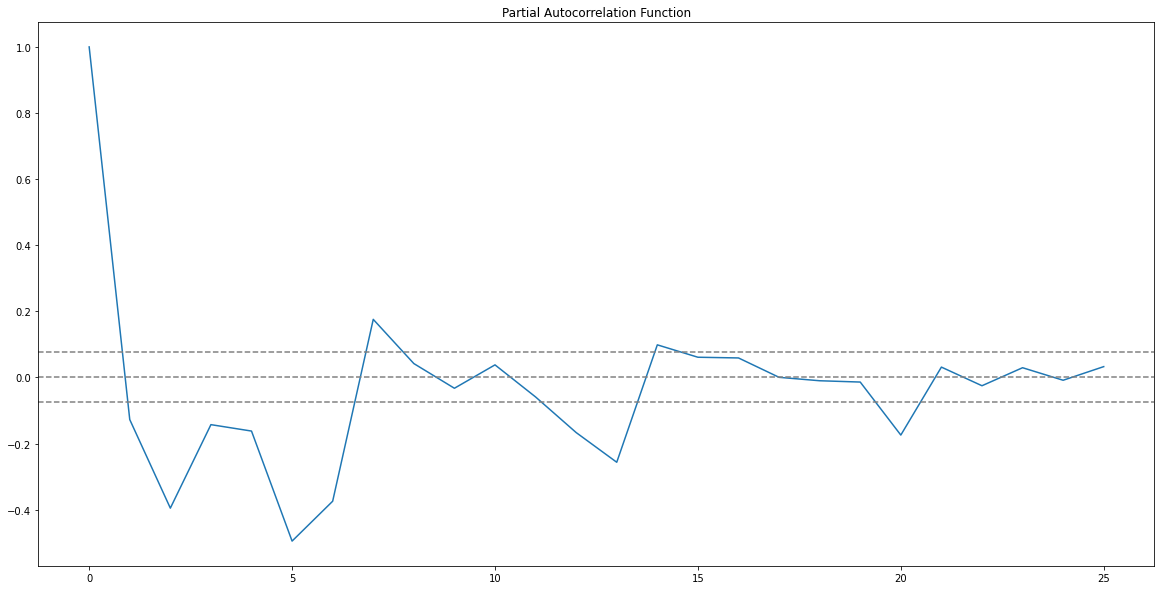

In [62]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()


- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p = 2